In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from PIL import Image
import copy
import sys
import os

sys.path
sys.path.append("\\home\\ch194765\\data\\M_Release")

%matplotlib inline

In [2]:
import visualize

(-0.5, 255.5, 255.5, -0.5)

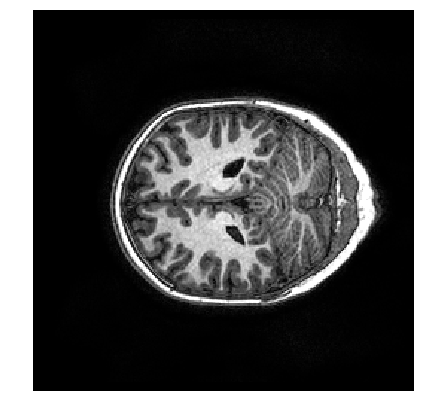

In [16]:
data_addr = "/home/ch194765/data/M_Release/"

img = nib.load(data_addr+"2489_mprage_deface.nii")
#lbls = nib.load(data_addr+"2_manual_cerebellum.nii")

dat = img.get_data()
#labels = lbls.get_data()

frame_num = 100
dat_frame = dat[:,:,frame_num]*256. / dat[:,:,frame_num].max()

dat.shape

plt.figure(figsize=(7,7))
plt.imshow(dat_frame.round(), cmap='gray')
plt.axis('off')


((256, 256), (256, 256), (256, 256))

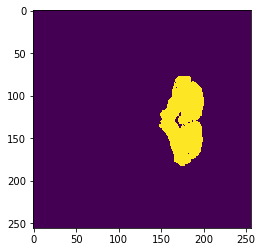

In [4]:
label_frame = labels[:,:,frame_num]
mask = np.zeros(label_frame.shape)
mask[label_frame>0] = .5

plt.imshow(mask)
mask.shape, dat_frame.shape, label_frame.shape

#blended = Image.composite(dat_frame, label_frame, mask)


In [17]:
interact(visualize.vis_unlabeled_slice, 
         frames=fixed(dat), 
         slice_num=widgets.IntSlider(min=0,max=dat.shape[2],step=1,value=0))

<function visualize.vis_unlabeled_slice>

In [18]:
par_addr = '/home/ch194765/repos/atlas-active-learning/parameters_releasing/'
pars = np.load(par_addr + 'b0_1_65.npy')data_a
pars.shape

(128,)

# Reading All the Data

First extracting all the "raw" samples from the specified directory:

In [33]:
data_addr = "/home/ch194765/data/M_Release/"

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(data_addr) if isfile(join(data_addr, f))]
first_letters = [name[:4] for name in onlyfiles]
unique_digits = np.unique(np.array([int(digit) for digit in first_letters]))
unique_digits


array([ 935, 2261, 2381, 2386, 2489, 2501, 2526, 2617, 2621, 2659, 2719,
       2734, 2821, 2827, 2828, 2839, 2846, 2855, 2869, 2873])

In [35]:
512*16*16

131072